In [35]:
# data manipulation
import numpy as np
import pandas as pd
# clustering algo
from sklearn.cluster import KMeans
# pca for visualization
from sklearn.decomposition import PCA
# printing results
import matplotlib.pyplot as plt
# encoding labels
from sklearn.preprocessing import LabelEncoder

from sklearn import manifold

In this notebook I'm going to do a cluster analysis of the dataset using the features extracted with elaboration.ipybn

In [2]:
df = pd.read_csv("mfcc_deltamfcc.csv", index_col="path")
df.head()

,label,0,1,2,3,4,5,6,7,8,...,190,191,192,193,194,195,196,197,198,199
path,,,,,,,,,,,,,,,,,,,,,
./Labelled/Bleatings/evt_000_000_000681_210415_150602.wav,Bleatings,0.347820,0.155233,-0.232169,-0.201178,0.206299,-0.812587,0.350786,-0.459605,-0.483644,...,-0.136273,-1.512237,0.313718,-0.025292,0.424550,0.618080,0.493849,-0.480913,0.115574,-0.861757
./Labelled/Bleatings/evt_000_000_000682_210415_150623.wav,Bleatings,0.600532,-0.009147,-0.807296,-0.633419,-0.555820,-0.483127,-0.247325,0.688479,1.102261,...,0.158165,-0.020859,0.099358,0.669381,-0.757209,0.146002,0.395391,0.874418,0.921241,0.427156
./Labelled/Bleatings/evt_000_000_000683_210415_150637.wav,Bleatings,0.146909,0.494060,-0.097277,0.017268,0.327210,0.516250,0.927306,-1.170098,0.393075,...,-0.856356,-0.551477,-0.552312,0.002518,-0.085520,-0.047403,-0.229064,-0.437311,0.156396,-0.163401
./Labelled/Bleatings/evt_000_000_000684_210415_150654.wav,Bleatings,0.805780,0.976582,-0.477301,0.686392,-0.606207,-1.136907,-1.306880,-0.922357,-0.334283,...,0.008805,-1.164836,-0.138124,0.264209,-0.138784,0.276497,-0.528750,0.180946,0.164339,-0.217783
./Labelled/Bleatings/evt_000_000_002434_210416_073853.wav,Bleatings,0.651157,-0.002178,-0.902648,0.265438,-1.208112,-0.640320,-0.343720,1.102376,0.713345,...,0.756449,0.452530,0.357011,0.359743,0.118464,0.318001,0.526162,0.199136,-0.190216,-0.760688


In [28]:
# etract some usefull data for further processing
idx = df.index
targets = df["label"].unique()

In [11]:
# Separating out the features
x = df.iloc[:, 1:].values
np.shape(x)

(827, 200)

In [38]:
# Separating out the target
y = df.loc[:,['label']]
encoder = LabelEncoder()
y = encoder.fit_transform(y)#Scaling the Feature columns
np.shape(y)

(827,)

Lets visualize with PCA the feature set extracted alog their original label

In [31]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pca.explained_variance_ratio_

array([0.34849991, 0.05491218])

We only carry out about 40% of the variances...

In [48]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2']).set_index(idx)

finalDf = pd.concat([principalDf, pd.DataFrame(y, columns=["label"]).set_index(idx)], axis = 1)
finalDf.head()

,pc1,pc2,label
path,,,
./Labelled/Bleatings/evt_000_000_000681_210415_150602.wav,-1.772103,1.125611,0
./Labelled/Bleatings/evt_000_000_000682_210415_150623.wav,-0.604543,0.784283,0
./Labelled/Bleatings/evt_000_000_000683_210415_150637.wav,-4.574767,1.188736,0
./Labelled/Bleatings/evt_000_000_000684_210415_150654.wav,-2.787314,3.150193,0
./Labelled/Bleatings/evt_000_000_002434_210416_073853.wav,-1.223680,-1.374238,0


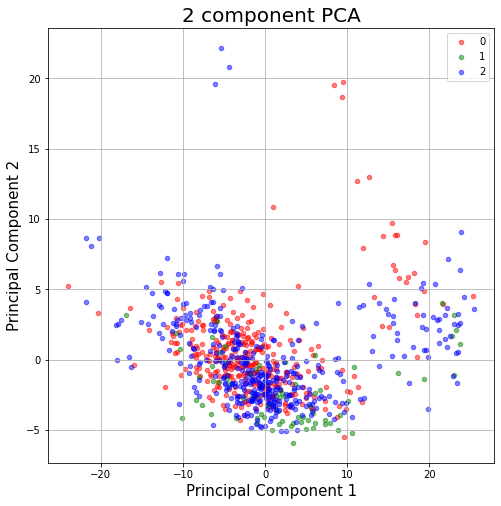

In [60]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

colors = ['r', 'g', 'b']

targets = [0,1,2]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1'], finalDf.loc[indicesToKeep, 'pc2'], c = color, s = 20, alpha=0.5)
ax.legend(targets)
ax.grid()

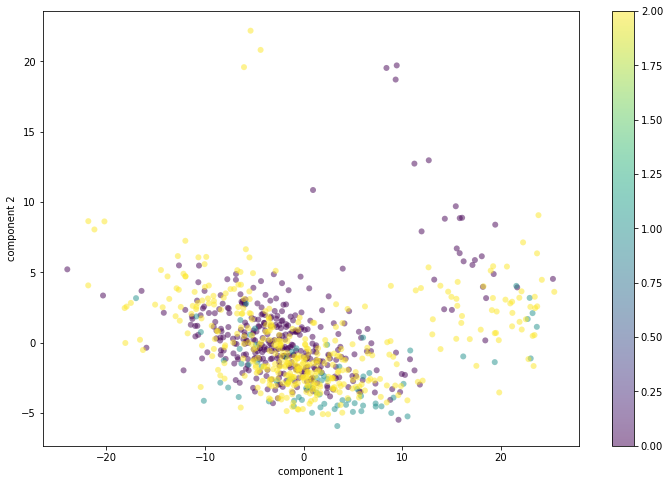

In [58]:
plt.figure(figsize = (12,8))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1],
            c=y, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();